In [1]:
# 載入必要的程式庫
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, Rectangle, Circle
import numpy as np
from IPython.display import display, HTML, Markdown
from graphviz import Digraph
import json

# 設定中文字體
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

print("程式庫載入完成")

程式庫載入完成


In [2]:
# 定義系統架構的數據結構

# 基礎設施層
infrastructure = {
    "containers": {
        "nginx": {"port": "80,443", "role": "Web Server", "image": "nginx:alpine"},
        "php-app": {"port": "9000", "role": "Laravel Application", "image": "custom-laravel"},
        "mysql": {"port": "3306", "role": "Database", "image": "mysql:8.0.32"},
        "redis": {"port": "6379", "role": "Cache & Queue", "image": "redis:alpine"}
    },
    "volumes": ["dbdata", "app-files", "nginx-config"]
}

# Laravel應用程式架構
application_architecture = {
    "presentation": {
        "routes": ["web.php", "api.php", "semi-api.php"],
        "middleware": ["auth", "permitted", "admin", "cors"],
        "controllers": ["BackendController", "CampController", "CheckInController", "AdminController"]
    },
    "business_logic": {
        "services": ["CampDataService", "ApplicantService", "BackendService", "GSheetService"],
        "models": ["User", "Applicant", "Camp", "Batch", "Role", "Permission"]
    },
    "data_access": {
        "migrations": "130+ migrations",
        "relationships": "Many-to-Many, One-to-Many"
    }
}

# 營隊類型
camp_types = {
    "adult_camps": ["acamp", "ecamp", "tcamp"],
    "youth_camps": ["ycamp", "hcamp"],
    "volunteer_camps": ["avcamp", "evcamp", "tvcamp", "yvcamp"],
    "special_camps": ["ceocamp", "scamp", "icamp", "ivcamp", "lrvcamp", "svcamp", "actcamp", "actvcamp", "utcamp"]
}

# 外部服務
external_services = {
    "authentication": "AWS Cognito",
    "file_storage": "Local Storage + Media Library",
    "spreadsheet": "Google Sheets API",
    "email": "Laravel Mail",
    "pdf_generation": "DomPDF",
    "excel_processing": "Maatwebsite Excel",
    "queue_processing": "Laravel Queue (Redis)",
    "monitoring": "Laravel Telescope + Sentry"
}

print("系統架構數據結構定義完成")

系統架構數據結構定義完成


/tmp/ipykernel_3871/4161398065.py:75: UserWarning: Glyph 29151 (\N{CJK UNIFIED IDEOGRAPH-71DF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/4161398065.py:75: UserWarning: Glyph 38538 (\N{CJK UNIFIED IDEOGRAPH-968A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/4161398065.py:75: UserWarning: Glyph 31649 (\N{CJK UNIFIED IDEOGRAPH-7BA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/4161398065.py:75: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/4161398065.py:75: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/4161398065.py:75: UserWarning: Glyph 32113 (\N{CJK UNIFIED IDEOGRAPH-7D71}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/4161398065.py:75: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}

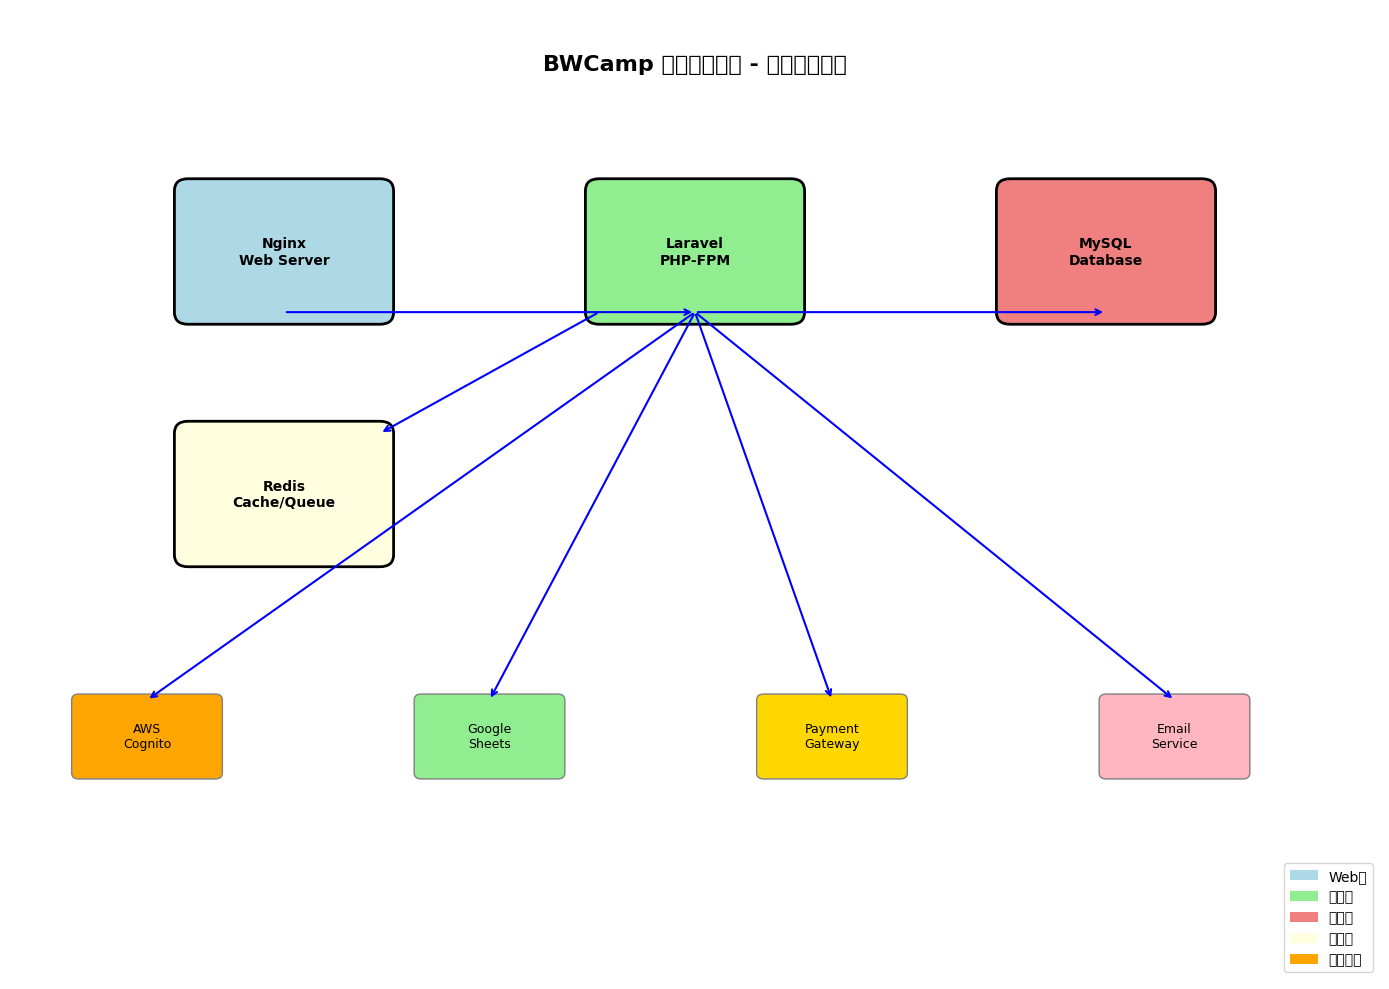

In [3]:
# 創建基礎設施架構圖

def create_infrastructure_diagram():
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 8)
    ax.axis('off')
    
    # 標題
    ax.text(5, 7.5, 'BWCamp 營隊管理系統 - 基礎設施架構', 
            fontsize=16, fontweight='bold', ha='center')
    
    # Docker容器
    containers = [
        {"name": "Nginx\nWeb Server", "pos": (2, 6), "color": "lightblue"},
        {"name": "Laravel\nPHP-FPM", "pos": (5, 6), "color": "lightgreen"},
        {"name": "MySQL\nDatabase", "pos": (8, 6), "color": "lightcoral"},
        {"name": "Redis\nCache/Queue", "pos": (2, 4), "color": "lightyellow"}
    ]
    
    # 繪製容器
    for container in containers:
        rect = FancyBboxPatch(
            (container["pos"][0]-0.7, container["pos"][1]-0.5),
            1.4, 1, boxstyle="round,pad=0.1",
            facecolor=container["color"], edgecolor='black', linewidth=2
        )
        ax.add_patch(rect)
        ax.text(container["pos"][0], container["pos"][1], container["name"],
                ha='center', va='center', fontsize=10, fontweight='bold')
    
    # 外部服務
    external_services_visual = [
        {"name": "AWS\nCognito", "pos": (1, 2), "color": "orange"},
        {"name": "Google\nSheets", "pos": (3.5, 2), "color": "lightgreen"},
        {"name": "Payment\nGateway", "pos": (6, 2), "color": "gold"},
        {"name": "Email\nService", "pos": (8.5, 2), "color": "lightpink"}
    ]
    
    for service in external_services_visual:
        rect = FancyBboxPatch(
            (service["pos"][0]-0.5, service["pos"][1]-0.3),
            1, 0.6, boxstyle="round,pad=0.05",
            facecolor=service["color"], edgecolor='gray', linewidth=1
        )
        ax.add_patch(rect)
        ax.text(service["pos"][0], service["pos"][1], service["name"],
                ha='center', va='center', fontsize=9)
    
    # 連接線
    connections = [
        ((2, 5.5), (5, 5.5)),  # Nginx -> Laravel
        ((5, 5.5), (8, 5.5)),  # Laravel -> MySQL
        ((4.3, 5.5), (2.7, 4.5)),  # Laravel -> Redis
        ((5, 5.5), (1, 2.3)),  # Laravel -> AWS Cognito
        ((5, 5.5), (3.5, 2.3)),  # Laravel -> Google Sheets
        ((5, 5.5), (6, 2.3)),  # Laravel -> Payment
        ((5, 5.5), (8.5, 2.3))  # Laravel -> Email
    ]
    
    for start, end in connections:
        ax.annotate('', xy=end, xytext=start,
                   arrowprops=dict(arrowstyle='->', lw=1.5, color='blue'))
    
    # 圖例
    legend_elements = [
        mpatches.Rectangle((0, 0), 1, 1, facecolor='lightblue', label='Web層'),
        mpatches.Rectangle((0, 0), 1, 1, facecolor='lightgreen', label='應用層'),
        mpatches.Rectangle((0, 0), 1, 1, facecolor='lightcoral', label='資料層'),
        mpatches.Rectangle((0, 0), 1, 1, facecolor='lightyellow', label='快取層'),
        mpatches.Rectangle((0, 0), 1, 1, facecolor='orange', label='外部服務')
    ]
    ax.legend(handles=legend_elements, loc='lower right')
    
    plt.tight_layout()
    plt.show()
    
create_infrastructure_diagram()

/tmp/ipykernel_3871/1788305512.py:132: UserWarning: Glyph 29151 (\N{CJK UNIFIED IDEOGRAPH-71DF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/1788305512.py:132: UserWarning: Glyph 38538 (\N{CJK UNIFIED IDEOGRAPH-968A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/1788305512.py:132: UserWarning: Glyph 31649 (\N{CJK UNIFIED IDEOGRAPH-7BA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/1788305512.py:132: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/1788305512.py:132: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/1788305512.py:132: UserWarning: Glyph 32113 (\N{CJK UNIFIED IDEOGRAPH-7D71}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/1788305512.py:132: UserWarning: Glyph 25033 (\N{CJK UNIFIED IDEOGRAP

/home/lzong/bwcamp/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31243 (\N{CJK UNIFIED IDEOGRAPH-7A0B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lzong/bwcamp/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24335 (\N{CJK UNIFIED IDEOGRAPH-5F0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lzong/bwcamp/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lzong/bwcamp/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lzong/bwcamp/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: User

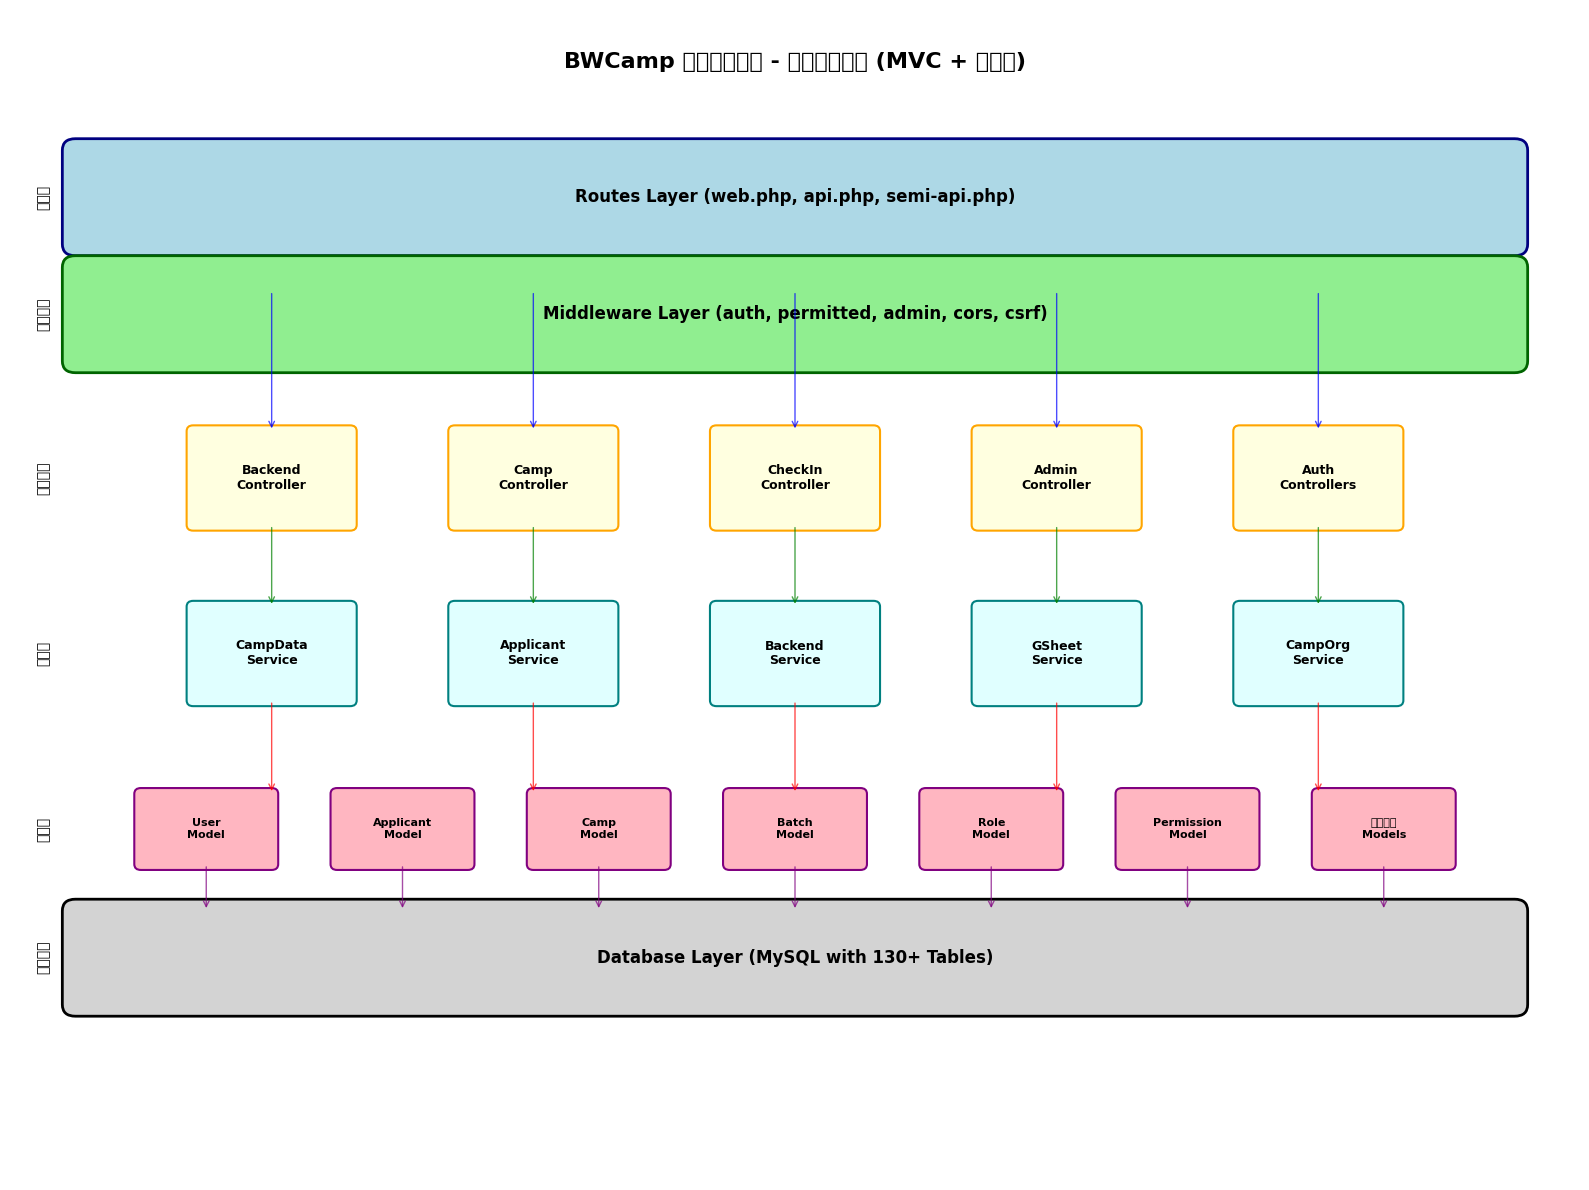

In [4]:
# 創建應用程式架構圖 (MVC + 服務層)

def create_application_architecture():
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # 標題
    ax.text(6, 9.5, 'BWCamp 營隊管理系統 - 應用程式架構 (MVC + 服務層)', 
            fontsize=16, fontweight='bold', ha='center')
    
    # 路由層
    route_layer = FancyBboxPatch((0.5, 8), 11, 0.8, boxstyle="round,pad=0.1",
                                facecolor='lightblue', edgecolor='navy', linewidth=2)
    ax.add_patch(route_layer)
    ax.text(6, 8.4, 'Routes Layer (web.php, api.php, semi-api.php)', 
            ha='center', va='center', fontsize=12, fontweight='bold')
    
    # 中間件層
    middleware_layer = FancyBboxPatch((0.5, 7), 11, 0.8, boxstyle="round,pad=0.1",
                                     facecolor='lightgreen', edgecolor='darkgreen', linewidth=2)
    ax.add_patch(middleware_layer)
    ax.text(6, 7.4, 'Middleware Layer (auth, permitted, admin, cors, csrf)', 
            ha='center', va='center', fontsize=12, fontweight='bold')
    
    # 控制器層
    controllers = [
        {"name": "Backend\nController", "pos": (2, 6), "desc": "主要管理介面"},
        {"name": "Camp\nController", "pos": (4, 6), "desc": "營隊報名"},
        {"name": "CheckIn\nController", "pos": (6, 6), "desc": "報到系統"},
        {"name": "Admin\nController", "pos": (8, 6), "desc": "系統管理"},
        {"name": "Auth\nControllers", "pos": (10, 6), "desc": "權限認證"}
    ]
    
    for controller in controllers:
        rect = FancyBboxPatch(
            (controller["pos"][0]-0.6, controller["pos"][1]-0.4),
            1.2, 0.8, boxstyle="round,pad=0.05",
            facecolor='lightyellow', edgecolor='orange', linewidth=1.5
        )
        ax.add_patch(rect)
        ax.text(controller["pos"][0], controller["pos"][1], controller["name"],
                ha='center', va='center', fontsize=9, fontweight='bold')
    
    # 服務層
    services = [
        {"name": "CampData\nService", "pos": (2, 4.5), "color": "lightcyan"},
        {"name": "Applicant\nService", "pos": (4, 4.5), "color": "lightcyan"},
        {"name": "Backend\nService", "pos": (6, 4.5), "color": "lightcyan"},
        {"name": "GSheet\nService", "pos": (8, 4.5), "color": "lightcyan"},
        {"name": "CampOrg\nService", "pos": (10, 4.5), "color": "lightcyan"}
    ]
    
    for service in services:
        rect = FancyBboxPatch(
            (service["pos"][0]-0.6, service["pos"][1]-0.4),
            1.2, 0.8, boxstyle="round,pad=0.05",
            facecolor=service["color"], edgecolor='teal', linewidth=1.5
        )
        ax.add_patch(rect)
        ax.text(service["pos"][0], service["pos"][1], service["name"],
                ha='center', va='center', fontsize=9, fontweight='bold')
    
    # 模型層
    models = [
        {"name": "User\nModel", "pos": (1.5, 3), "color": "lightpink"},
        {"name": "Applicant\nModel", "pos": (3, 3), "color": "lightpink"},
        {"name": "Camp\nModel", "pos": (4.5, 3), "color": "lightpink"},
        {"name": "Batch\nModel", "pos": (6, 3), "color": "lightpink"},
        {"name": "Role\nModel", "pos": (7.5, 3), "color": "lightpink"},
        {"name": "Permission\nModel", "pos": (9, 3), "color": "lightpink"},
        {"name": "營隊特定\nModels", "pos": (10.5, 3), "color": "lightpink"}
    ]
    
    for model in models:
        rect = FancyBboxPatch(
            (model["pos"][0]-0.5, model["pos"][1]-0.3),
            1, 0.6, boxstyle="round,pad=0.05",
            facecolor=model["color"], edgecolor='purple', linewidth=1.5
        )
        ax.add_patch(rect)
        ax.text(model["pos"][0], model["pos"][1], model["name"],
                ha='center', va='center', fontsize=8, fontweight='bold')
    
    # 資料庫層
    db_layer = FancyBboxPatch((0.5, 1.5), 11, 0.8, boxstyle="round,pad=0.1",
                             facecolor='lightgray', edgecolor='black', linewidth=2)
    ax.add_patch(db_layer)
    ax.text(6, 1.9, 'Database Layer (MySQL with 130+ Tables)', 
            ha='center', va='center', fontsize=12, fontweight='bold')
    
    # 連接線 (簡化顯示)
    # Routes -> Controllers
    for controller in controllers:
        ax.annotate('', xy=(controller["pos"][0], controller["pos"][1]+0.4), 
                   xytext=(controller["pos"][0], 7.6),
                   arrowprops=dict(arrowstyle='->', lw=1, color='blue', alpha=0.7))
    
    # Controllers -> Services
    for i, (controller, service) in enumerate(zip(controllers, services)):
        ax.annotate('', xy=(service["pos"][0], service["pos"][1]+0.4), 
                   xytext=(controller["pos"][0], controller["pos"][1]-0.4),
                   arrowprops=dict(arrowstyle='->', lw=1, color='green', alpha=0.7))
    
    # Services -> Models (簡化)
    for service in services:
        ax.annotate('', xy=(service["pos"][0], 3.3), 
                   xytext=(service["pos"][0], service["pos"][1]-0.4),
                   arrowprops=dict(arrowstyle='->', lw=1, color='red', alpha=0.7))
    
    # Models -> Database
    for model in models:
        ax.annotate('', xy=(model["pos"][0], 2.3), 
                   xytext=(model["pos"][0], model["pos"][1]-0.3),
                   arrowprops=dict(arrowstyle='->', lw=1, color='purple', alpha=0.7))
    
    # 添加層級標籤
    layers = [
        {"name": "路由層", "pos": (0.2, 8.4)},
        {"name": "中間件層", "pos": (0.2, 7.4)},
        {"name": "控制器層", "pos": (0.2, 6)},
        {"name": "服務層", "pos": (0.2, 4.5)},
        {"name": "模型層", "pos": (0.2, 3)},
        {"name": "資料庫層", "pos": (0.2, 1.9)}
    ]
    
    for layer in layers:
        ax.text(layer["pos"][0], layer["pos"][1], layer["name"], 
                fontsize=10, fontweight='bold', rotation=90, va='center')
    
    plt.tight_layout()
    plt.show()
    
create_application_architecture()

資料庫關係圖已生成


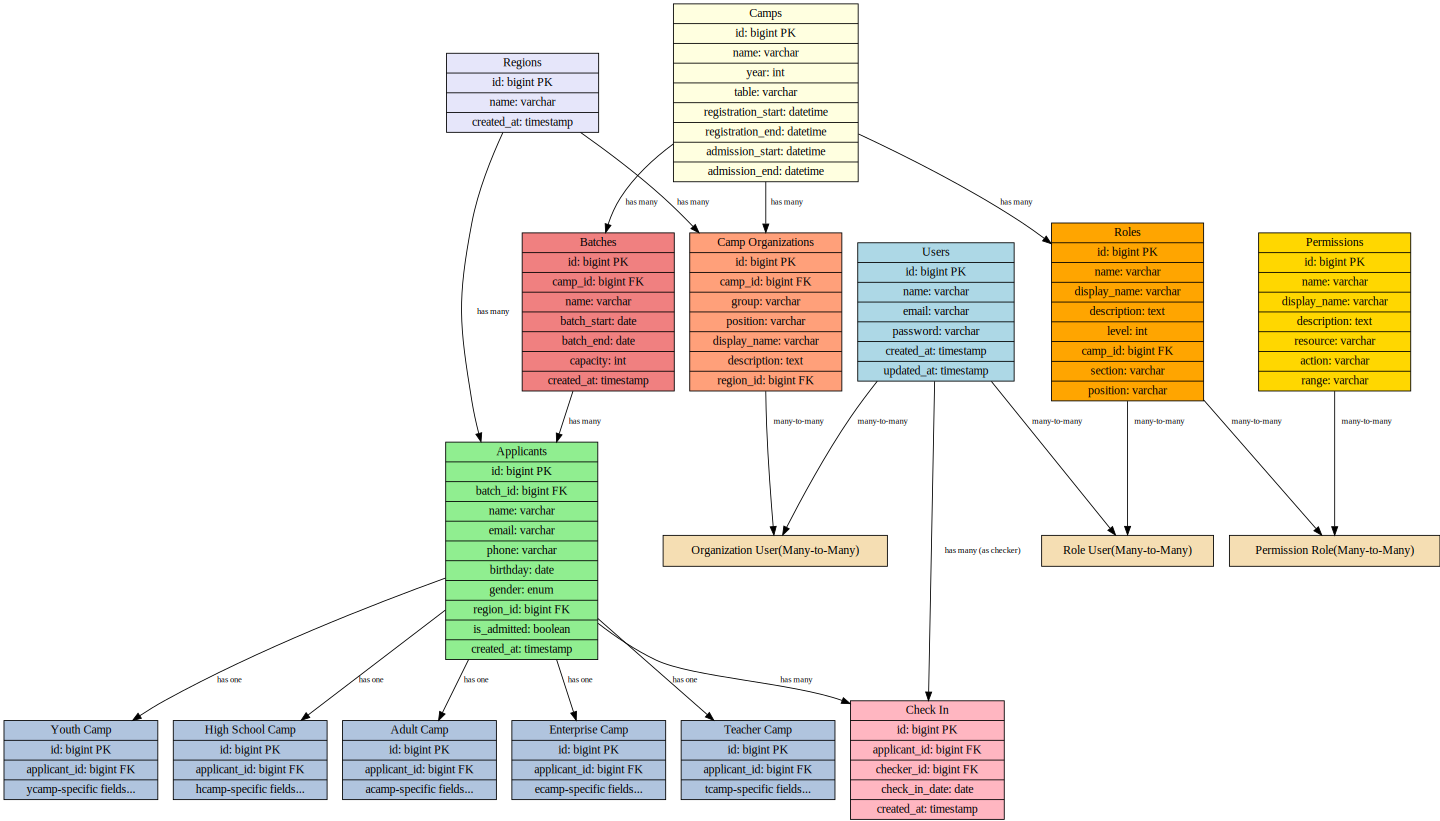

In [5]:
# 創建資料庫關係圖

def create_database_relationship_diagram():
    """建立資料庫關係圖"""
    dot = Digraph(comment='BWCamp Database Relationships')
    dot.attr(rankdir='TB', size='20,15')
    dot.attr('node', shape='record', style='filled')
    
    # 核心使用者表
    dot.node('users', '''{
        Users|
        id: bigint PK|
        name: varchar|
        email: varchar|
        password: varchar|
        created_at: timestamp|
        updated_at: timestamp
    }''', fillcolor='lightblue')
    
    dot.node('applicants', '''{
        Applicants|
        id: bigint PK|
        batch_id: bigint FK|
        name: varchar|
        email: varchar|
        phone: varchar|
        birthday: date|
        gender: enum|
        region_id: bigint FK|
        is_admitted: boolean|
        created_at: timestamp
    }''', fillcolor='lightgreen')
    
    dot.node('camps', '''{
        Camps|
        id: bigint PK|
        name: varchar|
        year: int|
        table: varchar|
        registration_start: datetime|
        registration_end: datetime|
        admission_start: datetime|
        admission_end: datetime
    }''', fillcolor='lightyellow')
    
    dot.node('batches', '''{
        Batches|
        id: bigint PK|
        camp_id: bigint FK|
        name: varchar|
        batch_start: date|
        batch_end: date|
        capacity: int|
        created_at: timestamp
    }''', fillcolor='lightcoral')
    
    # 權限相關
    dot.node('roles', '''{
        Roles|
        id: bigint PK|
        name: varchar|
        display_name: varchar|
        description: text|
        level: int|
        camp_id: bigint FK|
        section: varchar|
        position: varchar
    }''', fillcolor='orange')
    
    dot.node('permissions', '''{
        Permissions|
        id: bigint PK|
        name: varchar|
        display_name: varchar|
        description: text|
        resource: varchar|
        action: varchar|
        range: varchar
    }''', fillcolor='gold')
    
    # 營隊特定表格 (部分)
    camp_tables = [
        ('acamp', 'Adult Camp', 'lightsteelblue'),
        ('ecamp', 'Enterprise Camp', 'lightsteelblue'),
        ('tcamp', 'Teacher Camp', 'lightsteelblue'),
        ('ycamp', 'Youth Camp', 'lightsteelblue'),
        ('hcamp', 'High School Camp', 'lightsteelblue')
    ]
    
    for table_name, display_name, color in camp_tables:
        node_label = '''{
            %s|
            id: bigint PK|
            applicant_id: bigint FK|
            %s-specific fields...
        }''' % (display_name, table_name)
        dot.node(table_name, node_label, fillcolor=color)
    
    # 其他重要表格
    dot.node('regions', '''{
        Regions|
        id: bigint PK|
        name: varchar|
        created_at: timestamp
    }''', fillcolor='lavender')
    
    dot.node('camp_org', '''{
        Camp Organizations|
        id: bigint PK|
        camp_id: bigint FK|
        group: varchar|
        position: varchar|
        display_name: varchar|
        description: text|
        region_id: bigint FK
    }''', fillcolor='lightsalmon')
    
    dot.node('check_in', '''{
        Check In|
        id: bigint PK|
        applicant_id: bigint FK|
        checker_id: bigint FK|
        check_in_date: date|
        created_at: timestamp
    }''', fillcolor='lightpink')
    
    # 關聯表
    dot.node('role_user', 'Role User\n(Many-to-Many)', fillcolor='wheat')
    dot.node('permission_role', 'Permission Role\n(Many-to-Many)', fillcolor='wheat')
    dot.node('org_user', 'Organization User\n(Many-to-Many)', fillcolor='wheat')
    
    # 定義關係
    relationships = [
        ('camps', 'batches', 'has many'),
        ('batches', 'applicants', 'has many'),
        ('regions', 'applicants', 'has many'),
        ('applicants', 'acamp', 'has one'),
        ('applicants', 'ecamp', 'has one'),
        ('applicants', 'tcamp', 'has one'),
        ('applicants', 'ycamp', 'has one'),
        ('applicants', 'hcamp', 'has one'),
        ('applicants', 'check_in', 'has many'),
        ('users', 'check_in', 'has many (as checker)'),
        ('users', 'role_user', 'many-to-many'),
        ('roles', 'role_user', 'many-to-many'),
        ('roles', 'permission_role', 'many-to-many'),
        ('permissions', 'permission_role', 'many-to-many'),
        ('camps', 'roles', 'has many'),
        ('camps', 'camp_org', 'has many'),
        ('users', 'org_user', 'many-to-many'),
        ('camp_org', 'org_user', 'many-to-many'),
        ('regions', 'camp_org', 'has many')
    ]
    
    for source, target, label in relationships:
        dot.edge(source, target, label=label, fontsize='10')
    
    return dot

# 生成並顯示圖表
db_diagram = create_database_relationship_diagram()
print("資料庫關係圖已生成")
db_diagram

/tmp/ipykernel_3871/3099656401.py:99: UserWarning: Glyph 29151 (\N{CJK UNIFIED IDEOGRAPH-71DF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/3099656401.py:99: UserWarning: Glyph 38538 (\N{CJK UNIFIED IDEOGRAPH-968A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/3099656401.py:99: UserWarning: Glyph 31649 (\N{CJK UNIFIED IDEOGRAPH-7BA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/3099656401.py:99: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/3099656401.py:99: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/3099656401.py:99: UserWarning: Glyph 32113 (\N{CJK UNIFIED IDEOGRAPH-7D71}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/3099656401.py:99: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}

/home/lzong/bwcamp/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24291 (\N{CJK UNIFIED IDEOGRAPH-5EE3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lzong/bwcamp/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35542 (\N{CJK UNIFIED IDEOGRAPH-8AD6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lzong/bwcamp/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35242 (\N{CJK UNIFIED IDEOGRAPH-89AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lzong/bwcamp/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lzong/bwcamp/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: User

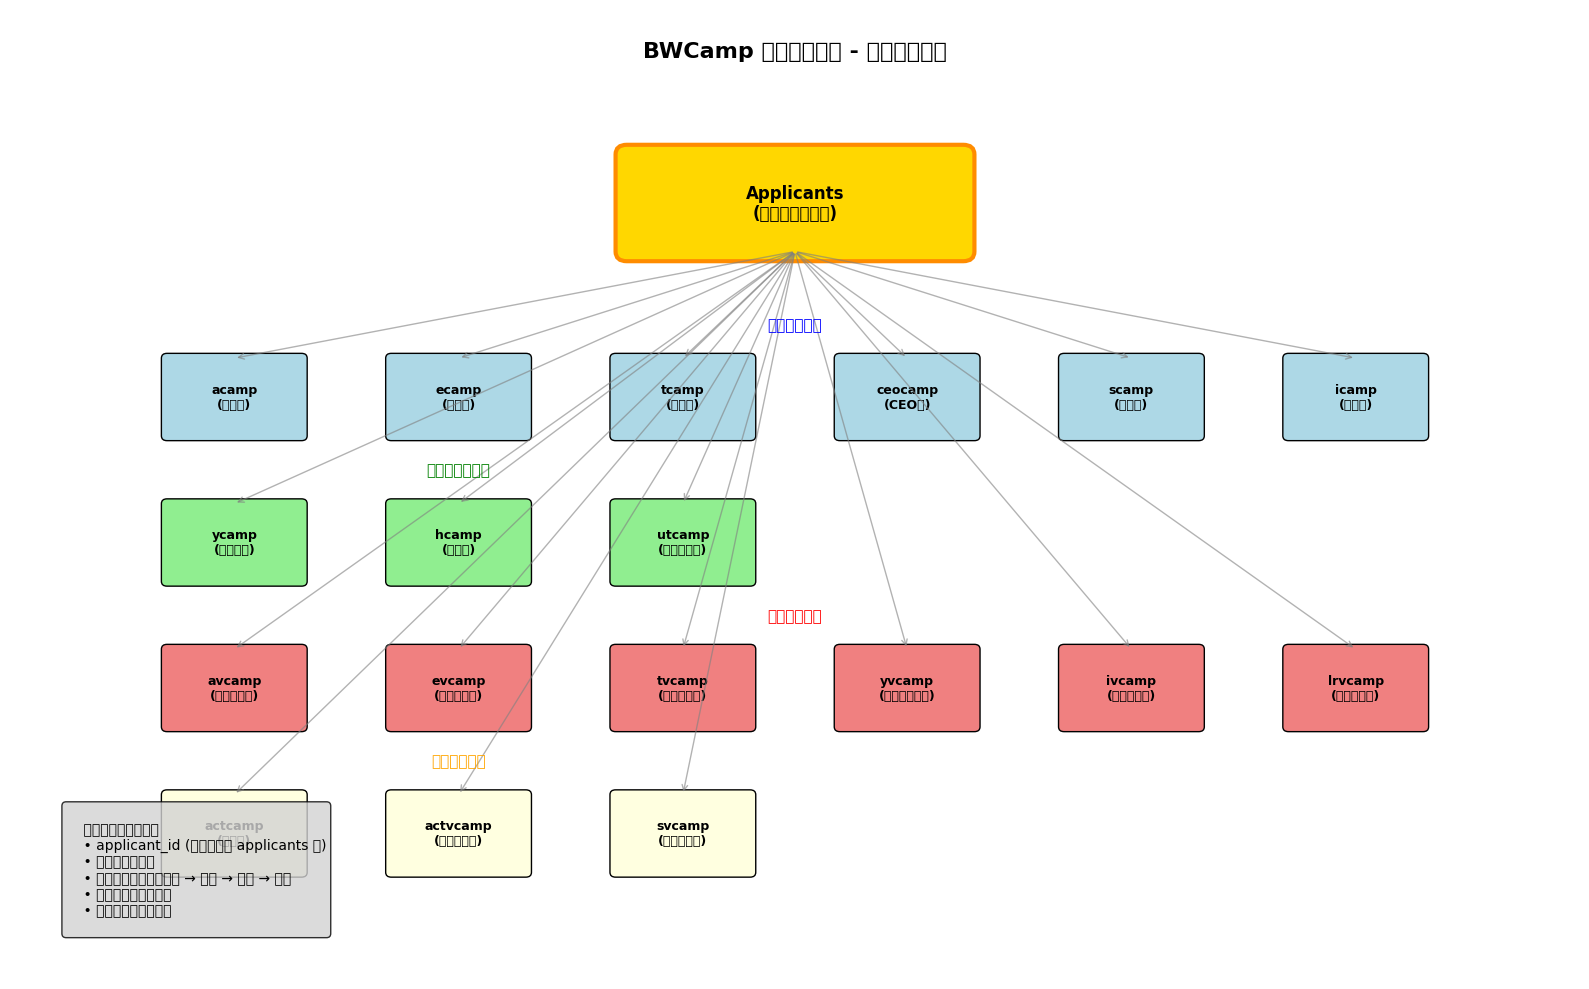

In [6]:
# 創建營隊類型架構圖

def create_camp_types_diagram():
    fig, ax = plt.subplots(1, 1, figsize=(16, 10))
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # 標題
    ax.text(7, 9.5, 'BWCamp 營隊管理系統 - 營隊類型架構', 
            fontsize=16, fontweight='bold', ha='center')
    
    # 核心 Applicant 模型
    core_rect = FancyBboxPatch(
        (5.5, 7.5), 3, 1, boxstyle="round,pad=0.1",
        facecolor='gold', edgecolor='darkorange', linewidth=3
    )
    ax.add_patch(core_rect)
    ax.text(7, 8, 'Applicants\n(核心報名者模型)', 
            ha='center', va='center', fontsize=12, fontweight='bold')
    
    # 成人營隊群組
    adult_camps = [
        {"name": "acamp\n(大專營)", "pos": (2, 6), "color": "lightblue"},
        {"name": "ecamp\n(企業營)", "pos": (4, 6), "color": "lightblue"},
        {"name": "tcamp\n(教師營)", "pos": (6, 6), "color": "lightblue"},
        {"name": "ceocamp\n(CEO營)", "pos": (8, 6), "color": "lightblue"},
        {"name": "scamp\n(師資營)", "pos": (10, 6), "color": "lightblue"},
        {"name": "icamp\n(國際營)", "pos": (12, 6), "color": "lightblue"}
    ]
    
    # 青少年營隊群組  
    youth_camps = [
        {"name": "ycamp\n(青少年營)", "pos": (2, 4.5), "color": "lightgreen"},
        {"name": "hcamp\n(高中營)", "pos": (4, 4.5), "color": "lightgreen"},
        {"name": "utcamp\n(大專營住宿)", "pos": (6, 4.5), "color": "lightgreen"}
    ]
    
    # 義工營隊群組
    volunteer_camps = [
        {"name": "avcamp\n(大專義工營)", "pos": (2, 3), "color": "lightcoral"},
        {"name": "evcamp\n(企業義工營)", "pos": (4, 3), "color": "lightcoral"},
        {"name": "tvcamp\n(教師義工營)", "pos": (6, 3), "color": "lightcoral"},
        {"name": "yvcamp\n(青少年義工營)", "pos": (8, 3), "color": "lightcoral"},
        {"name": "ivcamp\n(國際義工營)", "pos": (10, 3), "color": "lightcoral"},
        {"name": "lrvcamp\n(廣論義工營)", "pos": (12, 3), "color": "lightcoral"}
    ]
    
    # 特殊營隊群組
    special_camps = [
        {"name": "actcamp\n(親子營)", "pos": (2, 1.5), "color": "lightyellow"},
        {"name": "actvcamp\n(親子義工營)", "pos": (4, 1.5), "color": "lightyellow"},
        {"name": "svcamp\n(學生義工營)", "pos": (6, 1.5), "color": "lightyellow"}
    ]
    
    # 繪製所有營隊
    all_camps = adult_camps + youth_camps + volunteer_camps + special_camps
    
    for camp in all_camps:
        rect = FancyBboxPatch(
            (camp["pos"][0]-0.6, camp["pos"][1]-0.4),
            1.2, 0.8, boxstyle="round,pad=0.05",
            facecolor=camp["color"], edgecolor='black', linewidth=1
        )
        ax.add_patch(rect)
        ax.text(camp["pos"][0], camp["pos"][1], camp["name"],
                ha='center', va='center', fontsize=9, fontweight='bold')
        
        # 連接到核心 Applicant
        ax.annotate('', xy=(camp["pos"][0], camp["pos"][1]+0.4), 
                   xytext=(7, 7.5),
                   arrowprops=dict(arrowstyle='->', lw=1, color='gray', alpha=0.6))
    
    # 群組標籤
    group_labels = [
        {"text": "成人營隊群組", "pos": (7, 6.7), "color": "blue"},
        {"text": "青少年營隊群組", "pos": (4, 5.2), "color": "green"},
        {"text": "義工營隊群組", "pos": (7, 3.7), "color": "red"},
        {"text": "特殊營隊群組", "pos": (4, 2.2), "color": "orange"}
    ]
    
    for label in group_labels:
        ax.text(label["pos"][0], label["pos"][1], label["text"],
                fontsize=11, fontweight='bold', color=label["color"], ha='center')
    
    # 共同特徵說明
    features_text = '''
    每個營隊類型都有：
    • applicant_id (外鍵連接到 applicants 表)
    • 特定的報名欄位
    • 相同的基礎流程：報名 → 審核 → 錄取 → 報到
    • 統一的權限管理系統
    • 共用的後台管理介面
    '''
    
    ax.text(0.5, 0.5, features_text, fontsize=10, 
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
create_camp_types_diagram()

系統流程圖已生成


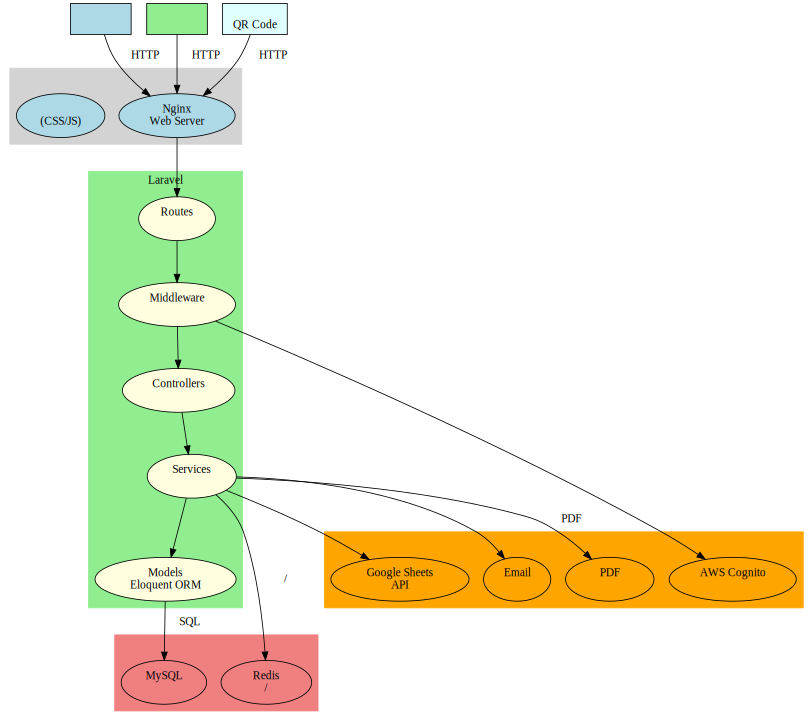

In [7]:
# 創建系統整體流程圖

def create_system_flow_diagram():
    dot = Digraph(comment='BWCamp System Flow')
    dot.attr(rankdir='TB', size='14,10')
    dot.attr('node', style='filled')
    
    # 用戶端
    dot.node('user_web', '學員網頁\n報名介面', fillcolor='lightblue', shape='box')
    dot.node('admin_web', '管理員\n後台介面', fillcolor='lightgreen', shape='box')
    dot.node('mobile', '手機報到\nQR Code', fillcolor='lightcyan', shape='box')
    
    # 前端層
    with dot.subgraph(name='cluster_frontend') as c:
        c.attr(label='前端層', style='filled', color='lightgray')
        c.node('nginx', 'Nginx\nWeb Server', fillcolor='lightblue')
        c.node('static_files', '靜態檔案\n(CSS/JS)', fillcolor='lightblue')
    
    # 應用層
    with dot.subgraph(name='cluster_application') as c:
        c.attr(label='Laravel 應用層', style='filled', color='lightgreen')
        c.node('routes', 'Routes\n路由層', fillcolor='lightyellow')
        c.node('middleware', 'Middleware\n中間件', fillcolor='lightyellow')
        c.node('controllers', 'Controllers\n控制器', fillcolor='lightyellow')
        c.node('services', 'Services\n服務層', fillcolor='lightyellow')
        c.node('models', 'Models\nEloquent ORM', fillcolor='lightyellow')
    
    # 資料層
    with dot.subgraph(name='cluster_data') as c:
        c.attr(label='資料層', style='filled', color='lightcoral')
        c.node('mysql', 'MySQL\n主資料庫', fillcolor='lightcoral')
        c.node('redis', 'Redis\n快取/佇列', fillcolor='lightcoral')
    
    # 外部服務
    with dot.subgraph(name='cluster_external') as c:
        c.attr(label='外部服務', style='filled', color='orange')
        c.node('cognito', 'AWS Cognito\n身份認證', fillcolor='orange')
        c.node('google_sheets', 'Google Sheets\nAPI', fillcolor='orange')
        c.node('email', 'Email\n服務', fillcolor='orange')
        c.node('pdf', 'PDF生成\n服務', fillcolor='orange')
    
    # 主要流程連接
    dot.edge('user_web', 'nginx', 'HTTP請求')
    dot.edge('admin_web', 'nginx', 'HTTP請求')
    dot.edge('mobile', 'nginx', 'HTTP請求')
    
    dot.edge('nginx', 'routes', '轉發請求')
    dot.edge('routes', 'middleware', '中間件處理')
    dot.edge('middleware', 'controllers', '控制器處理')
    dot.edge('controllers', 'services', '業務邏輯')
    dot.edge('services', 'models', '資料操作')
    dot.edge('models', 'mysql', 'SQL查詢')
    
    # 快取和佇列
    dot.edge('services', 'redis', '快取/佇列')
    
    # 外部服務連接
    dot.edge('middleware', 'cognito', '身份驗證')
    dot.edge('services', 'google_sheets', '資料同步')
    dot.edge('services', 'email', '發送郵件')
    dot.edge('services', 'pdf', '產生PDF')
    
    return dot

# 生成流程圖
flow_diagram = create_system_flow_diagram()
print("系統流程圖已生成")
flow_diagram

/tmp/ipykernel_3871/2494437081.py:140: UserWarning: Glyph 27402 (\N{CJK UNIFIED IDEOGRAPH-6B0A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/2494437081.py:140: UserWarning: Glyph 38480 (\N{CJK UNIFIED IDEOGRAPH-9650}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/2494437081.py:140: UserWarning: Glyph 31649 (\N{CJK UNIFIED IDEOGRAPH-7BA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/2494437081.py:140: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/2494437081.py:140: UserWarning: Glyph 26550 (\N{CJK UNIFIED IDEOGRAPH-67B6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/2494437081.py:140: UserWarning: Glyph 27083 (\N{CJK UNIFIED IDEOGRAPH-69CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3871/2494437081.py:140: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAP

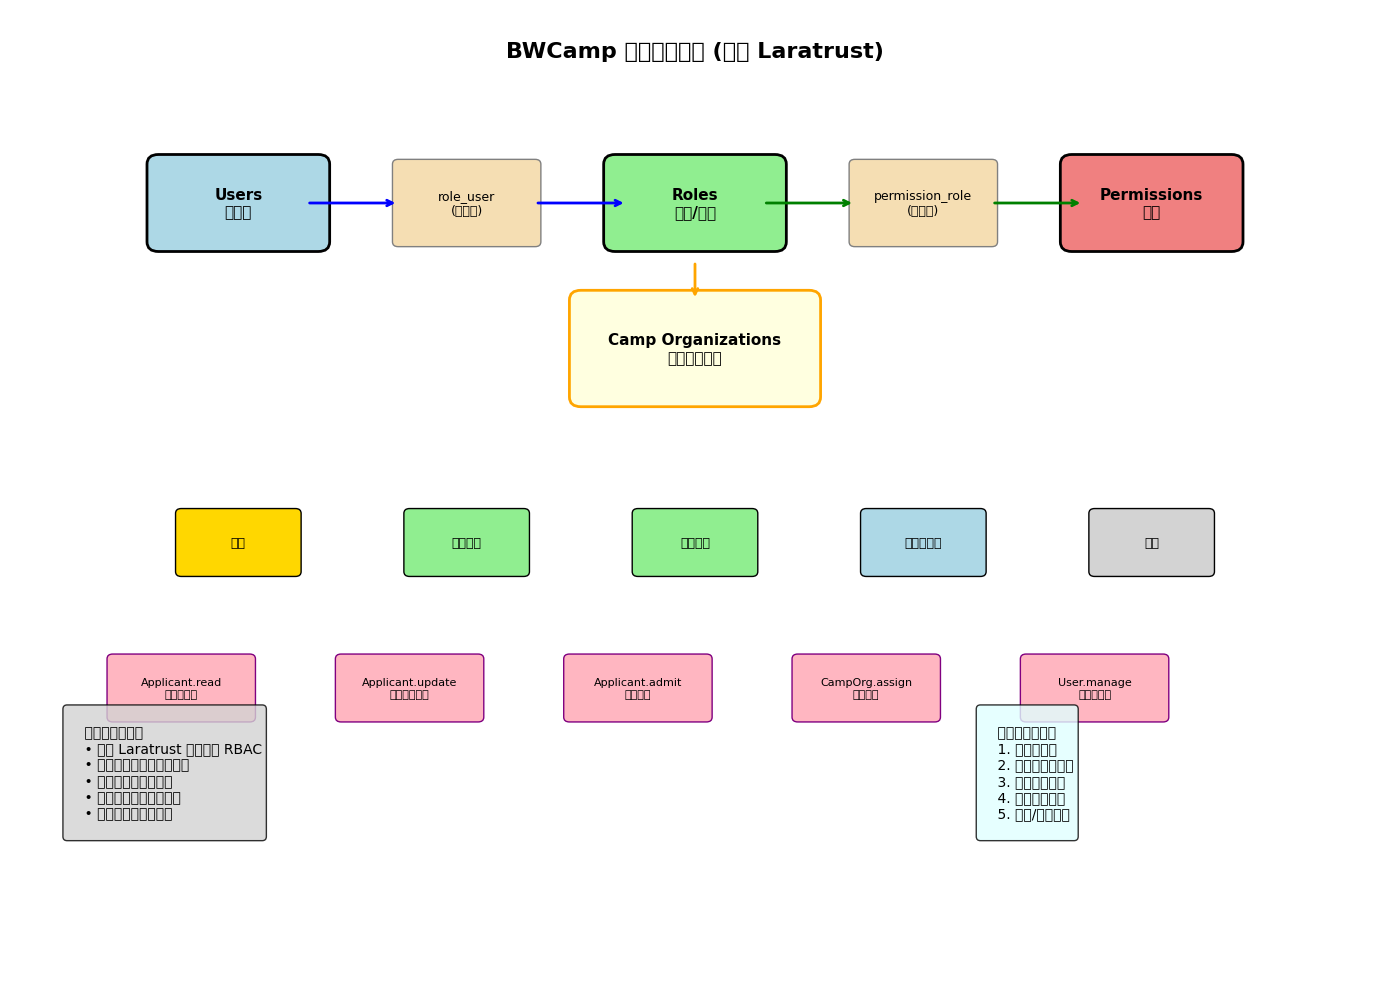

In [8]:
# 創建權限管理架構圖

def create_permission_architecture():
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # 標題
    ax.text(6, 9.5, 'BWCamp 權限管理架構 (基於 Laratrust)', 
            fontsize=16, fontweight='bold', ha='center')
    
    # 核心實體
    entities = [
        {"name": "Users\n使用者", "pos": (2, 8), "color": "lightblue", "size": (1.4, 0.8)},
        {"name": "Roles\n角色/職務", "pos": (6, 8), "color": "lightgreen", "size": (1.4, 0.8)},
        {"name": "Permissions\n權限", "pos": (10, 8), "color": "lightcoral", "size": (1.4, 0.8)}
    ]
    
    for entity in entities:
        rect = FancyBboxPatch(
            (entity["pos"][0]-entity["size"][0]/2, entity["pos"][1]-entity["size"][1]/2),
            entity["size"][0], entity["size"][1], boxstyle="round,pad=0.1",
            facecolor=entity["color"], edgecolor='black', linewidth=2
        )
        ax.add_patch(rect)
        ax.text(entity["pos"][0], entity["pos"][1], entity["name"],
                ha='center', va='center', fontsize=11, fontweight='bold')
    
    # 關聯表
    relations = [
        {"name": "role_user\n(多對多)", "pos": (4, 8), "color": "wheat"},
        {"name": "permission_role\n(多對多)", "pos": (8, 8), "color": "wheat"}
    ]
    
    for relation in relations:
        rect = FancyBboxPatch(
            (relation["pos"][0]-0.6, relation["pos"][1]-0.4),
            1.2, 0.8, boxstyle="round,pad=0.05",
            facecolor=relation["color"], edgecolor='gray', linewidth=1
        )
        ax.add_patch(rect)
        ax.text(relation["pos"][0], relation["pos"][1], relation["name"],
                ha='center', va='center', fontsize=9)
    
    # 營隊組織架構
    camp_org = FancyBboxPatch(
        (5, 6), 2, 1, boxstyle="round,pad=0.1",
        facecolor='lightyellow', edgecolor='orange', linewidth=2
    )
    ax.add_patch(camp_org)
    ax.text(6, 6.5, 'Camp Organizations\n營隊組織架構', 
            ha='center', va='center', fontsize=11, fontweight='bold')
    
    # 組織職務範例
    positions = [
        {"name": "總召", "pos": (2, 4.5), "color": "gold"},
        {"name": "關懷組長", "pos": (4, 4.5), "color": "lightgreen"},
        {"name": "行政組長", "pos": (6, 4.5), "color": "lightgreen"},
        {"name": "關懷小組長", "pos": (8, 4.5), "color": "lightblue"},
        {"name": "義工", "pos": (10, 4.5), "color": "lightgray"}
    ]
    
    for position in positions:
        rect = FancyBboxPatch(
            (position["pos"][0]-0.5, position["pos"][1]-0.3),
            1, 0.6, boxstyle="round,pad=0.05",
            facecolor=position["color"], edgecolor='black', linewidth=1
        )
        ax.add_patch(rect)
        ax.text(position["pos"][0], position["pos"][1], position["name"],
                ha='center', va='center', fontsize=9, fontweight='bold')
    
    # 權限範例
    permission_examples = [
        {"name": "Applicant.read\n查看報名者", "pos": (1.5, 3), "color": "lightpink"},
        {"name": "Applicant.update\n修改報名資料", "pos": (3.5, 3), "color": "lightpink"},
        {"name": "Applicant.admit\n審核錄取", "pos": (5.5, 3), "color": "lightpink"},
        {"name": "CampOrg.assign\n指派職務", "pos": (7.5, 3), "color": "lightpink"},
        {"name": "User.manage\n管理使用者", "pos": (9.5, 3), "color": "lightpink"}
    ]
    
    for perm in permission_examples:
        rect = FancyBboxPatch(
            (perm["pos"][0]-0.6, perm["pos"][1]-0.3),
            1.2, 0.6, boxstyle="round,pad=0.05",
            facecolor=perm["color"], edgecolor='purple', linewidth=1
        )
        ax.add_patch(rect)
        ax.text(perm["pos"][0], perm["pos"][1], perm["name"],
                ha='center', va='center', fontsize=8)
    
    # 連接線
    # Users -> role_user
    ax.annotate('', xy=(3.4, 8), xytext=(2.6, 8),
               arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
    
    # role_user -> Roles
    ax.annotate('', xy=(5.4, 8), xytext=(4.6, 8),
               arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
    
    # Roles -> permission_role
    ax.annotate('', xy=(7.4, 8), xytext=(6.6, 8),
               arrowprops=dict(arrowstyle='->', lw=2, color='green'))
    
    # permission_role -> Permissions
    ax.annotate('', xy=(9.4, 8), xytext=(8.6, 8),
               arrowprops=dict(arrowstyle='->', lw=2, color='green'))
    
    # Roles -> Camp Organizations
    ax.annotate('', xy=(6, 7), xytext=(6, 7.4),
               arrowprops=dict(arrowstyle='->', lw=2, color='orange'))
    
    # 說明文字
    explanation = '''
    權限管理特色：
    • 基於 Laratrust 套件實現 RBAC
    • 支援營隊特定的權限範圍
    • 階層式組織架構管理
    • 細粒度的資源存取控制
    • 支援多營隊權限隔離
    '''
    
    ax.text(0.5, 1.5, explanation, fontsize=10, 
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.8))
    
    # 權限檢查流程
    check_flow = '''
    權限檢查流程：
    1. 使用者登入
    2. 檢查使用者角色
    3. 驗證角色權限
    4. 檢查資源範圍
    5. 允許/拒絕存取
    '''
    
    ax.text(8.5, 1.5, check_flow, fontsize=10, 
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcyan', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
create_permission_architecture()

## 系統架構總結

### BWCamp 營隊管理系統架構特點

#### 1. **分層架構設計**
- **基礎設施層**: Docker 容器化部署 (Nginx + PHP-FPM + MySQL + Redis)
- **應用程式層**: Laravel MVC 框架 + 服務層模式
- **資料庫層**: MySQL 關聯式資料庫，130+ 張表
- **快取層**: Redis 用於快取和佇列處理

#### 2. **多營隊支援架構**
- **核心模型**: Applicant 作為所有營隊的基礎報名者模型
- **營隊特化**: 每種營隊類型有專屬的資料表 (acamp, ecamp, tcamp 等)
- **統一流程**: 報名 → 審核 → 錄取 → 報到的標準化流程
- **彈性欄位**: 各營隊可有特定的報名欄位需求

#### 3. **權限管理系統**
- **RBAC模型**: 基於 Laratrust 套件的角色權限控制
- **階層式組織**: 營隊組織架構的樹狀管理
- **細粒度權限**: 資源級別的存取控制 (Resource.Action 模式)
- **營隊隔離**: 不同營隊的權限完全分離

#### 4. **外部服務整合**
- **AWS Cognito**: 身份認證服務
- **Google Sheets**: 資料同步與匯出
- **支付系統**: 虛擬帳號和線上支付
- **郵件服務**: 自動化通知系統
- **PDF生成**: 報名表和證書產生

#### 5. **可擴展性設計**
- **服務層模式**: 業務邏輯與控制器分離
- **佇列處理**: 非同步任務處理
- **快取機制**: 提升系統效能
- **模組化架構**: 新營隊類型易於擴展

#### 6. **開發與維護友善**
- **Laravel生態**: 豐富的套件支援
- **統一後台**: 所有營隊共用管理介面
- **日誌監控**: Telescope 和 Sentry 整合
- **測試支援**: PHPUnit 和 Pest 測試框架

這個架構成功支援了多種營隊類型的管理，提供了統一而靈活的解決方案。